In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def G(x, m):
    return m[0] * np.exp(m[1] * x) + m[2] * x * np.exp(m[3] * x)

sigma = 0.01
x_data = np.linspace(1,7,25)

# These are the true values that we will attempt to recover
m_t = np.array([1,-.5,1,-.75])

# The 'data' which we generate with a noise signal
data = G(x,m_t) + np.random.randn(x.size) * sigma

In [7]:
# Initialize our 4 parameters
m_0 = np.zeros(4)
m_0[0] = np.random.uniform(low=0.0, high=2.0)
m_0[1] = np.random.uniform(low=-1.0, high=0.0)
m_0[2] = np.random.uniform(low=0.0, high=2.0)
m_0[3] = np.random.uniform(low=-1.0, high=0.0)

In [27]:
def do_mcmc_step(m, d, x, s):
    """ Performs one MCMC step, returns a proposed solution and
        a binary 0/1 if the proposal is accepted """

    # First we'll generate a proposed solution
    m_p = m + np.random.randn(m.size) * s

    # Next we'll find log(q(d|m_p)) [first term] and
    # log(q(d|m)) [second term]
    first_term = -(1 / 2) * np.sum(np.square(d - G(x, m_p)) / s ** 2)
    second_term = -(1 / 2) * np.sum(np.square(d - G(x, m)) / s ** 2)

    # Find the log of the acceptance rate
    log_alpha = np.minimum(0, first_term - second_term)

    # Generate w in log(rand([0, 1])) and check if w < log(alpha)
    w = np.log(np.random.random())

    if w < log_alpha:   # Accept the proposal
        m_new = m_p
        accept = 1
    else:               # Deny the proposal and keep the old m
        m_new = m
        accept = 0

    return m_new, accept

In [28]:
# Run one mcmc step to get our first proposed solution
solution, accept = do_mcmc_step(m_0, data, data, 0.005)

# Now do 10,000 'burner' steps to get an initial estimate
for i in range(10000):
    solution, accept = do_mcmc_step(solution, data, x_data, 0.005)

In [35]:
# Track our acceptance rate
num_accept = 0
acceptance_rate = list()

# Run a whole lot of MCMC steps
m_sample = list()
for i in range(1, 400001):
    solution, accept = do_mcmc_step(solution, data, x_data, 0.005)
    num_accept += accept
    acceptance_rate.append(num_accept / i)
    # Sample variables every 1000 iterations
    if i % 100 == 0:
        m_sample.append(solution)

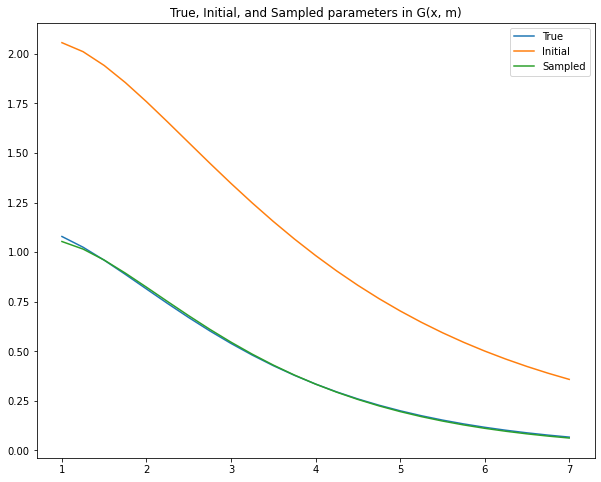

In [36]:
fig = plt.figure(figsize=(10,8))
plt.plot(x_data, G(x_data, m_t))
plt.plot(x_data, G(x_data, m_0))
plt.plot(x_data, G(x_data, solution))
plt.title('True, Initial, and Sampled parameters in G(x, m)')
plt.legend(['True', 'Initial', 'Sampled'])
plt.show()

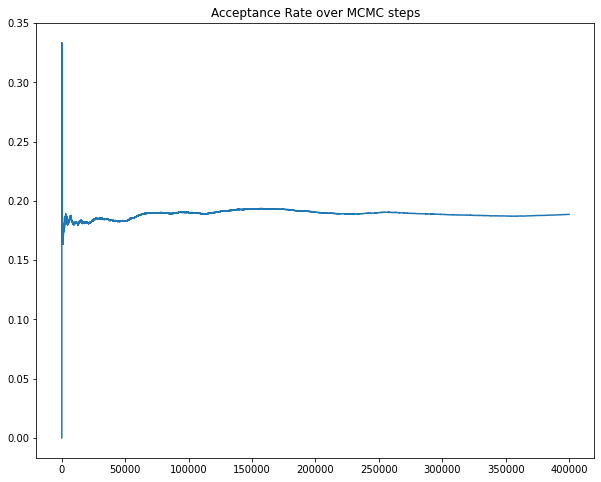

In [37]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(len(acceptance_rate)), acceptance_rate)
plt.title('Acceptance Rate over MCMC steps')
plt.show()

## How close were we? ##

To answer this I plotted histograms of every 1000 MCMC steps below, along with the mean and std

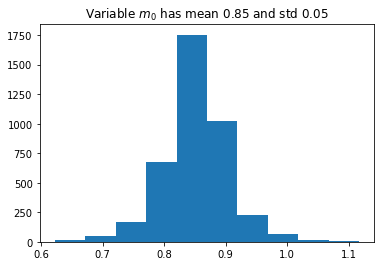

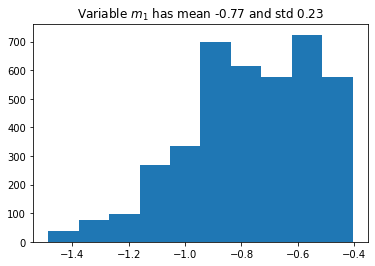

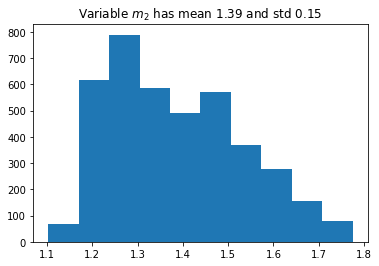

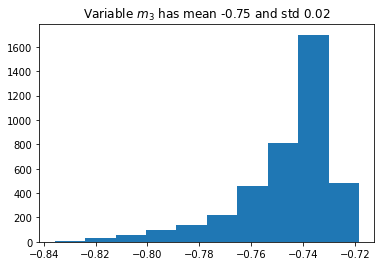

In [38]:
# Convert out list of our sampled variables to an np array
m_sample_array = np.array(m_sample)

# Plot our 4 variables as histograms, compute their mean/std
plt.hist(m_sample_array[:, 0], bins=10)
mean1 = np.mean(m_sample_array[:, 0])
std1 = np.std(m_sample_array[:, 0])
plt.title(f'Variable $m_0$ has mean {mean1:.2f} and std {std1:.2f}')
plt.show()

plt.hist(m_sample_array[:, 1], bins=10)
mean2 = np.mean(m_sample_array[:, 1])
std2 = np.std(m_sample_array[:, 1])
plt.title(f'Variable $m_1$ has mean {mean2:.2f} and std {std2:.2f}')
plt.show()

plt.hist(m_sample_array[:, 2], bins=10)
mean3 = np.mean(m_sample_array[:, 2])
std3 = np.std(m_sample_array[:, 2])
plt.title(f'Variable $m_2$ has mean {mean3:.2f} and std {std3:.2f}')
plt.show()

plt.hist(m_sample_array[:, 3], bins=10)
mean4 = np.mean(m_sample_array[:, 3])
std4 = np.std(m_sample_array[:, 3])
plt.title(f'Variable $m_3$ has mean {mean4:.2f} and std {std4:.2f}')
plt.show()